**Getting the Data**

In [5]:
# Step 1: Install necessary library
!pip install geopy

# Step 2: Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from geopy.distance import geodesic
import time
from IPython.display import clear_output

**Import data**

In [6]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Set the file path for the CSV file
file_path = '/content/train.csv'  # Update this if the file is in a different folder

# Step 3: Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Optional: Display the first few rows to verify
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [8]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


**Checking for null values**

In [10]:
df.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [11]:
print(df.columns)
print([col for col in df.columns if 'pickup' in col.lower()])  # Search for column names containing 'pickup'

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')
['pickup_datetime', 'pickup_longitude', 'pickup_latitude']


In [12]:
#Converting timestamp to datetime format to fetch the other details as listed below
#identifying problematic values too
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')
print(df['pickup_datetime'].isna().sum())
print(df['dropoff_datetime'].isna().sum())

0
0


In [13]:
#to gain more insights from the data.
df['weekday'] = df.pickup_datetime.dt.day_name()
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

**Calculate distance between pickup and dropoff coordinates using geodesic**

In [14]:
from geopy.distance import geodesic

# Define the function to calculate distance between two points
def calculate_distance(row):
    # Check if any of the coordinates are NaN or 0
    if pd.isnull(row['pickup_latitude']) or pd.isnull(row['pickup_longitude']) or pd.isnull(row['dropoff_latitude']) or pd.isnull(row['dropoff_longitude']):
        return None
    if (row['pickup_latitude'] == 0 or row['pickup_longitude'] == 0 or
        row['dropoff_latitude'] == 0 or row['dropoff_longitude'] == 0):
        return None

    # Calculate the distance
    return geodesic((row['pickup_latitude'], row['pickup_longitude']),
                    (row['dropoff_latitude'], row['dropoff_longitude'])).miles

# Step 1: Calculate the distance and assign directly to the original DataFrame 'df'
df['distance'] = df.apply(calculate_distance, axis=1)

# Step 2: Verify if the distance column is created
print(df[['distance']].head())



   distance
0  0.933406
1  1.123849
2  3.964154
3  0.921886
4  0.737591


**Calculate Speed in miles/hr**

In [15]:
# can proceed with other calculations like speed
df['speed'] = df['distance'] / (df['trip_duration'] / 3600)  # Ensure 'trip_duration' is in seconds

**Data Analysis**

In [16]:
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df.passenger_count.value_counts()

,count
passenger_count,
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1


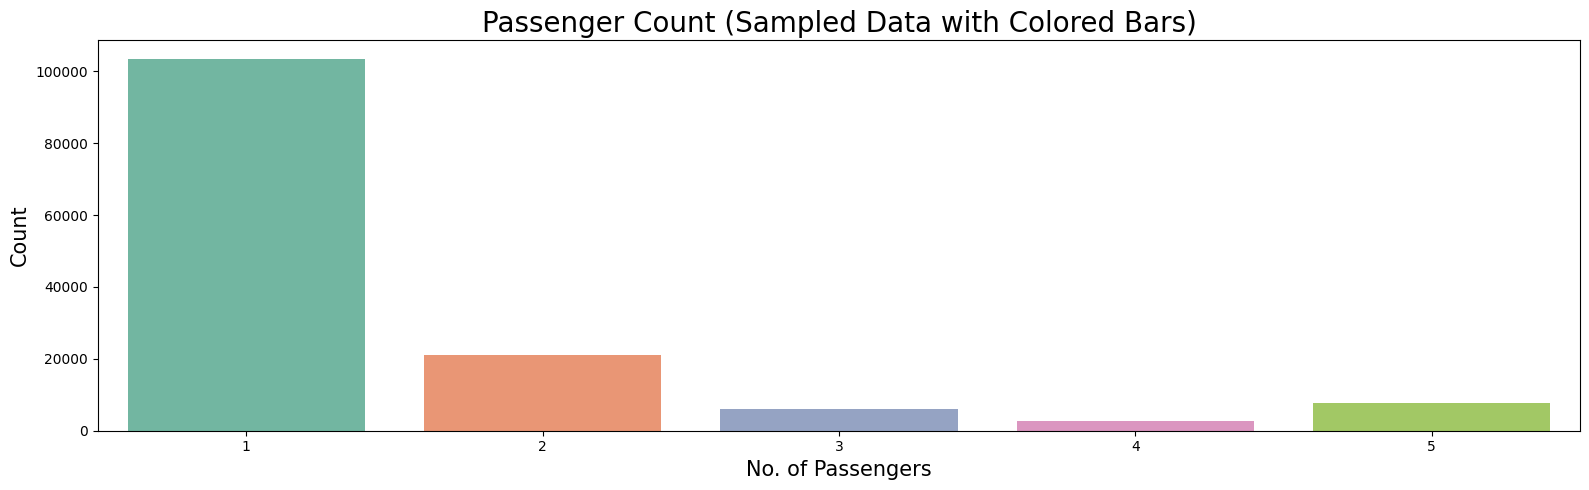

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter valid passenger counts (typically between 1 and 5)
valid_passenger_counts = df['passenger_count'].isin([1, 2, 3, 4, 5])
df_valid = df.loc[valid_passenger_counts]

# Step 2: Sample 10% of the valid data (adjust the fraction as needed)
df_sample = df_valid.sample(frac=0.1, random_state=42)  # Sampling 10%

# Step 3: Define a color palette for the bars (adjust the colors as needed)
palette_colors = sns.color_palette("Set2", 5)  # Using Set2 palette for 5 different passenger counts

# Step 4: Plot the countplot for valid passenger counts with custom colors and no legend
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
line = sns.countplot(x=df_sample['passenger_count'], hue=df_sample['passenger_count'],
                     palette=palette_colors, legend=False)
line.set_ylabel("Count", fontsize=15)
line.set_xlabel("No. of Passengers", fontsize=15)
line.set_title('Passenger Count (Sampled Data with Colored Bars)', fontsize=20)
fig.tight_layout()

# Step 5: Show the plot
plt.show()


**Clustering**

In [22]:
coords = np.vstack((df[['pickup_latitude', 'pickup_longitude']].values,
                    df[['dropoff_latitude', 'dropoff_longitude']].values))

In [23]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])
df.loc[:, 'pickup_cluster'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude']])
df.loc[:, 'dropoff_cluster'] = kmeans.predict(df[['dropoff_latitude', 'dropoff_longitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


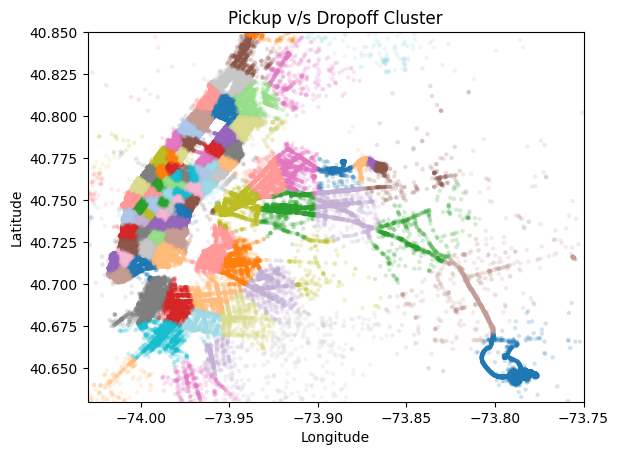

In [25]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df.pickup_longitude.values, df.pickup_latitude.values, s=10, lw=0,
           c=df.pickup_cluster.values, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Pickup v/s Dropoff Cluster')
plt.show()